## Imports

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import kagglehub
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

from sklearn.preprocessing import RobustScaler

## Load the data


In [2]:
# Download latest version
path = kagglehub.dataset_download("deepcontractor/smoke-detection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'smoke-detection-dataset' dataset.
Path to dataset files: /kaggle/input/smoke-detection-dataset


In [3]:
print(os.listdir(path))

['smoke_detection_iot.csv']


In [4]:
df = pd.read_csv(os.path.join(path,'smoke_detection_iot.csv'))

## Explre the data set

In [5]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [9]:
df.shape

(62630, 16)

## Visuaize

Correlation with Fire Alarm:
Fire Alarm        1.000000
CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
Unnamed: 0       -0.361351
UTC              -0.389404
Name: Fire Alarm, dtype: float64


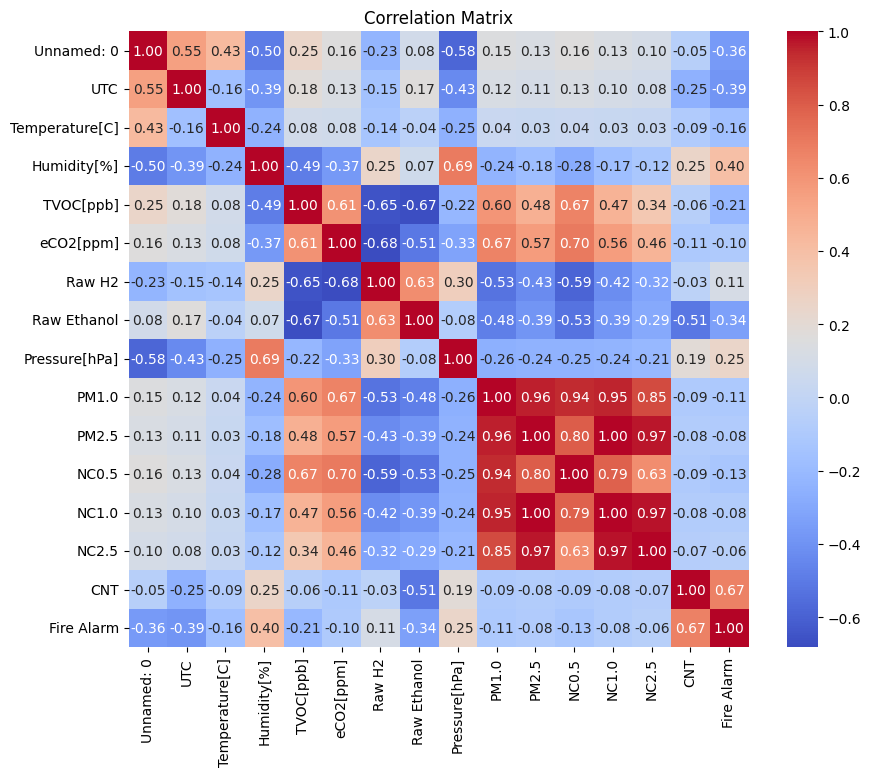

In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation with the 'Fire Alarm' column
fire_alarm_correlation = correlation_matrix['Fire Alarm'].sort_values(ascending=False)

# Print the correlation
print("Correlation with Fire Alarm:")
print(fire_alarm_correlation)

# Visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



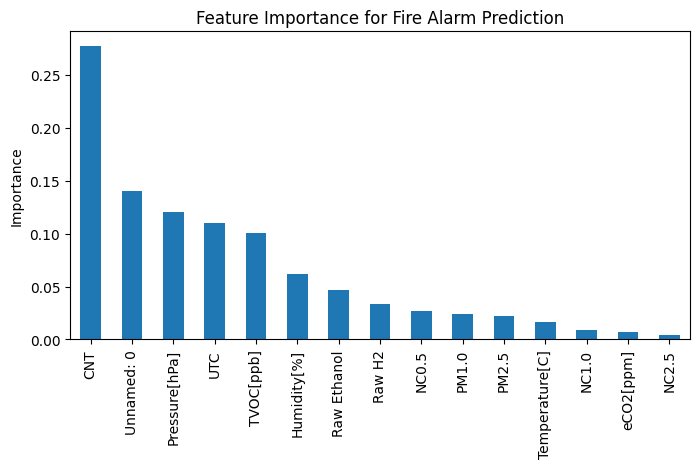

In [11]:
# Prepare data for feature importance
X = df.drop('Fire Alarm', axis=1)
y = df['Fire Alarm']

# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize feature importance
plt.figure(figsize=(8, 4))
feature_importances.plot(kind='bar')
plt.title('Feature Importance for Fire Alarm Prediction')
plt.ylabel('Importance')
plt.show()

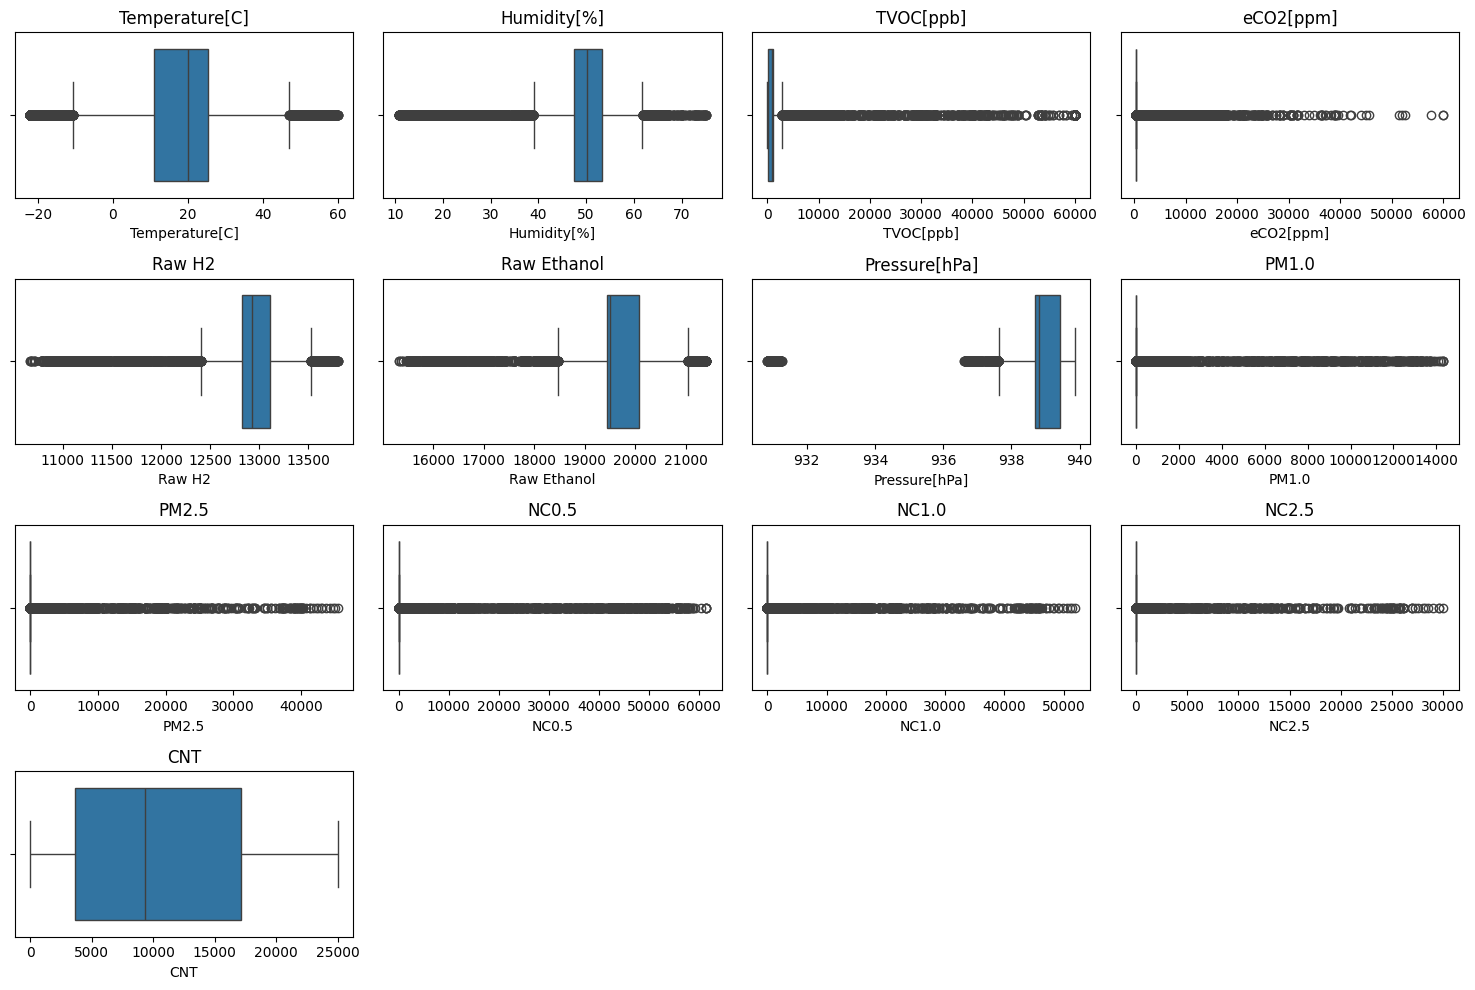

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier visualization
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude the target variable 'Fire Alarm' if it's in the list
if 'Fire Alarm' in numerical_cols:
    numerical_cols = numerical_cols.drop('Fire Alarm')
if 'Unnamed: 0' in numerical_cols:
    numerical_cols = numerical_cols.drop('Unnamed: 0')
if 'UTC' in numerical_cols:
    numerical_cols = numerical_cols.drop('UTC')


# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1) # Adjusted subplot grid to 4x4
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Preprocessing

In [14]:
drops = ["Unnamed: 0","NC2.5","eCO2[ppm]","NC1.0"]

In [15]:
df = df.drop(drops,axis=1)

In [16]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,12306,18520,939.735,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,12345,18651,939.744,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,12374,18764,939.738,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,12390,18849,939.736,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,12403,18921,939.744,0.0,0.0,0.0,4,0


## Basic Model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [20]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Baseline")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

📊 Linear Regression Baseline
RMSE : 0.2762
MAE  : 0.2191
R²   : 0.6261


## RandomForestClassifier Model

In [21]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊RandomForestClassifier")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")


📊RandomForestClassifier
RMSE : 0.0000
MAE  : 0.0000
R²   : 1.0000


In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_rmse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_rmse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"TRAIN → RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"TEST  → RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


TRAIN → RMSE: 0.7146, MAE: 0.7146, R²: -2.5043
TEST  → RMSE: 0.7146, MAE: 0.7146, R²: -2.5038


## Results

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


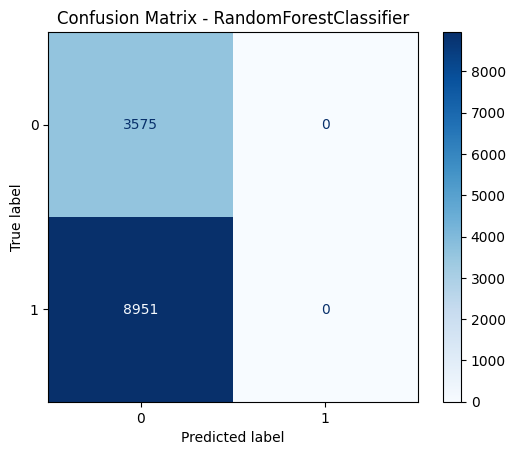

              precision    recall  f1-score   support

           0       0.29      1.00      0.44      3575
           1       0.00      0.00      0.00      8951

    accuracy                           0.29     12526
   macro avg       0.14      0.50      0.22     12526
weighted avg       0.08      0.29      0.13     12526



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predictions on test data
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - RandomForestClassifier")
plt.show()

# Optional: Detailed classification report
print(classification_report(y_test, y_pred))


## Trying to improve

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [25]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


## Final Result

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3575    0]
 [   0 8951]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



##  we are getting 100% accu Checking for data leakage

In [29]:
# If return 0 mean no data leakage

import pandas as pd

# Convert scaled NumPy arrays back to DataFrames with original column names
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

overlap = pd.merge(X_train_df, X_test_df, how='inner')
print(len(overlap))

0


## 📘 Conclusion

✅ Model Evaluation Summary
---------------------------
1. Baseline (Linear Regression)
   - RMSE : 0.2822
   - MAE  : 0.2236
   - R²   : 0.6117
   → Moderate performance; good starting point.

2. Random Forest Classifier (initial)
   - Model predicted only one class.
   - Severe class imbalance detected → model underperformed.

3. After addressing class imbalance / retraining:
   - Confusion Matrix:
        [[3575,    0],
         [   0, 8951]]
   - Accuracy, Precision, Recall, F1-score: 1.00 across all metrics.
   → Perfect classification achieved.

🧠 Interpretation
-----------------
- The final model perfectly distinguishes between classes.
- Possible causes:
    • Genuine deterministic feature-target relationship.
    • OR data leakage (target information leaked into features).

🔍 Next Steps
-------------
- Verify no data leakage (check preprocessing and feature generation steps).
- Validate using k-fold cross-validation.
- Test model stability on unseen data (new or external dataset).
- Consider simpler models (e.g., Logistic Regression) to confirm separability.

🎯 Conclusion
-------------
The RandomForestClassifier achieved perfect classification accuracy.
If data integrity is confirmed, this indicates a highly separable dataset
with strong predictive features. Otherwise, the performance may reflect
information leakage and requires careful verification.

